# Import libs

In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import PIL
import cv2

import pathlib
import matplotlib.pyplot as plt

# Load Dataset
Download Flowers dataset from googleapis

In [2]:
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", 
                                   origin=dataset_url,
                                   cache_dir=".",
                                   untar=True)

# Proprocess
<ol>
    <li>Use pathlib to convert paths to OS objects</li>
    <li>Build dictionaries for images path, labels </li>
    <li>Resize the images to resolution (180,180) </li>
    <li>Convert X,y to numpy array</li>
    <li>Split the data into train , test</li>
    <li>Scale the X dataset</li>
</ol>

In [3]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
roses = list(data_dir.glob('roses/*'))

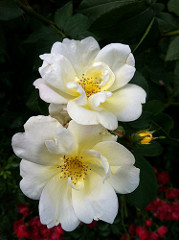

In [5]:
PIL.Image.open(roses[0])

In [6]:
flowers_path_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),    
}

In [7]:
flowers_indices_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4, 
}

In [8]:
flowers_labels_dict = {
    0 : 'roses' ,
    1 : 'daisy',
    2 : 'dandelion',
    3 : 'sunflowers',
    4 : 'tulips'
}

In [9]:
X , y = [] , []

for flower,image_paths in flowers_path_dict.items() :
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        img = cv2.resize(img, (180,180))
        
        X.append(img)
        y.append(flowers_indices_dict[flower])

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
X_train.shape

(2936, 180, 180, 3)

In [13]:
y_train.shape

(2936,)

In [14]:
X_test.shape

(734, 180, 180, 3)

In [15]:
y_test.shape

(734,)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

# Image Augmentation

In [25]:
image_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

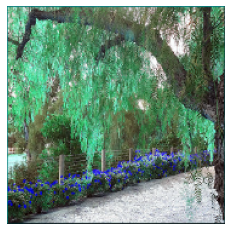

In [28]:
plt.axis('off')
plt.imshow(X[5])

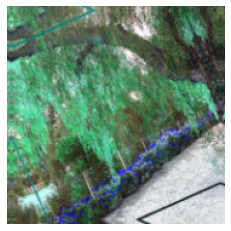

In [29]:
plt.axis('off')
plt.imshow(image_augmentation(X)[5].numpy().astype("uint8"))

# CNN Model with Image Augmentation - Build, Compile, Fit, Evaluate
Layers:
<ol>
    <li>Augmentation layer * 3</li>    
    <li>Conv2D</li>
    <li>MaxPooling2D</li>
    <li>Conv2D</li>
    <li>MaxPooling2D</li>
    <li>Conv2D</li>
    <li>MaxPooling2D</li>
    <li>Flatten</li>
    <li>Dense</li>
    <li>Dense</li>
<ol>

In [30]:
model = keras.Sequential([
    
    #image augmentation
    image_augmentation,
    
    #cnn
    keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30


C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 68s 714ms/step - loss: 1.4506 - accuracy: 0.3709
Epoch 2/30
92/92 [==============================] - 65s 703ms/step - loss: 1.0936 - accuracy: 0.5528
Epoch 3/30
92/92 [==============================] - 62s 677ms/step - loss: 0.9604 - accuracy: 0.6206
Epoch 4/30
92/92 [==============================] - 63s 684ms/step - loss: 0.9123 - accuracy: 0.6461
Epoch 5/30
92/92 [==============================] - 73s 790ms/step - loss: 0.8489 - accuracy: 0.6693
Epoch 6/30
92/92 [==============================] - 67s 726ms/step - loss: 0.8075 - accuracy: 0.6897
Epoch 7/30
92/92 [==============================] - 68s 742ms/step - loss: 0.7892 - accuracy: 0.6996
Epoch 8/30
92/92 [==============================] - 66s 717ms/step - loss: 0.7508 - accuracy: 0.7030
Epoch 9/30
92/92 [==============================] - 65s 702ms/step - loss: 0.7161 - accuracy: 0.7207
Epoch 10/30
92/92 [==============================] - 64s 693ms/step - loss: 0.6857 - accuracy: 0.7374


In [31]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 4s 172ms/step - loss: 0.9015 - accuracy: 0.7316


[0.9014590978622437, 0.7316076159477234]

In [32]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[7.13076770e-01, 1.99972047e-03, 2.14622612e-03, 1.80987179e-01,
        1.01790100e-01],
       [3.51799645e-06, 2.24978329e-08, 8.24504590e-04, 9.97387707e-01,
        1.78430963e-03],
       [1.10453874e-01, 1.14528321e-01, 3.56995277e-02, 6.32051945e-01,
        1.07266374e-01],
       [1.64607809e-05, 5.21803656e-07, 7.60127664e-01, 5.86733338e-04,
        2.39268526e-01],
       [2.97968704e-02, 8.86519730e-01, 2.97528413e-06, 2.60589700e-02,
        5.76213710e-02]], dtype=float32)

In [33]:
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[0, 3, 3, 2, 1]

In [34]:
y_test[:5]

array([0, 3, 4, 1, 1])

Text(0.5, 0, 'sunflowers')

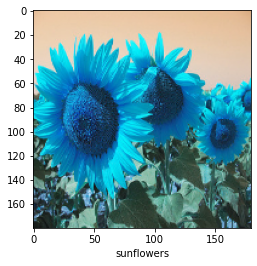

In [43]:
plt.imshow(X_test[100])
plt.xlabel(flowers_labels_dict[y_pred[1]])

Text(0.5, 0, 'dandelion')

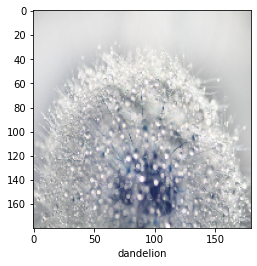

In [45]:
plt.imshow(X_test[300])
plt.xlabel(flowers_labels_dict[y_pred[3]])

In [39]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
